# Exploratory Data Analysis: Lower Layer Super Output Areas (LSOAs)

This notebook presents a structured exploratory data analysis (EDA) of Lower Layer Super Output Areas (LSOAs), which are standardised statistical geographies used across the United Kingdom. LSOAs enable consistent small-area reporting of social, demographic, and economic indicators.

The primary aim of this analysis is to examine and prepare geospatial boundary data in conjunction with deprivation indices—specifically, the Index of Multiple Deprivation (IMD). The analysis includes both statistical and spatial components and is designed to support downstream modelling and interactive visualisation within an applied public health or health services context.

## Objectives

- Load LSOA boundary data directly from an authoritative UK government source (ONS).
- Integrate the LSOA spatial data with tabular deprivation statistics (IMD).
- Perform summary statistics and visualise geographic distributions of deprivation.
- Clean and export the merged dataset for use in geospatial modelling and application development.


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import warnings
import fiona
import os


# Clean plotting style and suppress irrelevant warnings
sns.set(style='whitegrid')
warnings.filterwarnings("ignore")

In [2]:

# Relative paths (from /notebooks/)
lsoa_path = "../data/raw/uk-small-area-lsoa-soa-dz-apr-2021.gpkg"
imd_path = "../data/raw/LSOA_IMD.csv"

# Layer name identified from Fiona inspection
layer_name = "LSOA_2021_EW_BFC"

# File check diagnostics
print(f"File exists: {os.path.exists(lsoa_path)}")
print("\nAvailable layers in GeoPackage:")
print(fiona.listlayers(lsoa_path))


File exists: True

Available layers in GeoPackage:
['uk-small-area-lsoa-soa-dz-apr-2021']


In [3]:
# Load GeoPackage layer
lsoa_gdf = gpd.read_file(lsoa_path, layer="uk-small-area-lsoa-soa-dz-apr-2021")

# Basic diagnostics
print(f" Loaded {lsoa_gdf.shape[0]:,} LSOA records")
print(" Columns:", lsoa_gdf.columns.tolist())
lsoa_gdf.head()


 Loaded 42,619 LSOA records
 Columns: ['areacode', 'areaname', 'country', 'geometry']


,areacode,areaname,country,geometry
0,E01000001,City of London 001A,E,"MULTIPOLYGON (((532095.563 181577.351, 532095...."
1,E01000002,City of London 001B,E,"MULTIPOLYGON (((532267.728 181643.781, 532262...."
2,E01000003,City of London 001C,E,"MULTIPOLYGON (((532105.312 182010.574, 532104...."
3,E01000005,City of London 001E,E,"MULTIPOLYGON (((533610.974 181410.968, 533615...."
4,E01000006,Barking and Dagenham 016A,E,"MULTIPOLYGON (((544817.826 184346.261, 544815...."


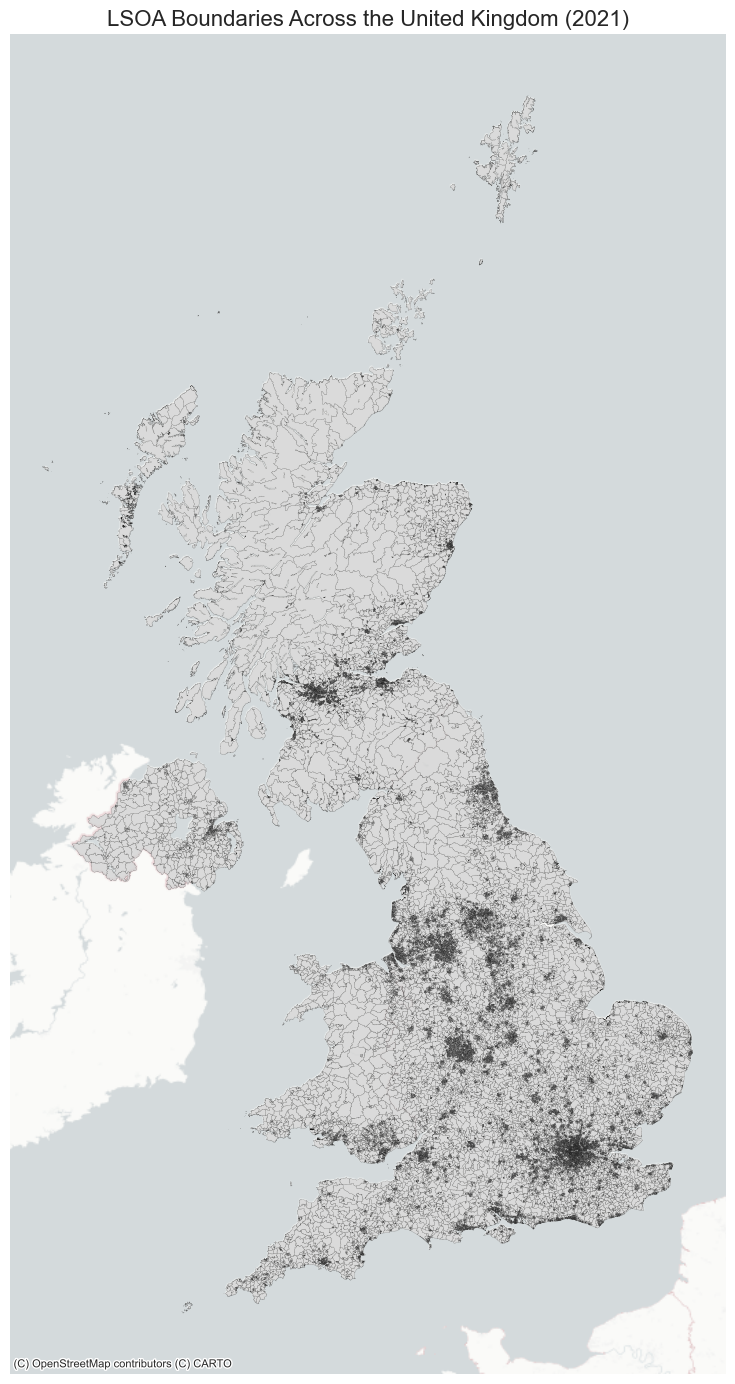

In [4]:
# Ensure projection matches contextily basemap
lsoa_gdf_web = lsoa_gdf.to_crs(epsg=3857)

# Plot: All UK LSOA boundaries
fig, ax = plt.subplots(figsize=(12, 14))

lsoa_gdf_web.plot(
    ax=ax,
    edgecolor="black",
    facecolor="lightgrey",
    linewidth=0.1,
    alpha=0.8
)

# Add contextual basemap
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.PositronNoLabels,
    crs=lsoa_gdf_web.crs
)

# Final formatting
ax.set_title("LSOA Boundaries Across the United Kingdom (2021)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()

Index(['FID', 'NHSER23CD', 'NHSER23NM', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')
   NHSER23CD                 NHSER23NM
0  E40000003                    London
1  E40000005                South East
2  E40000006                South West
3  E40000007           East of England
4  E40000010                North West
5  E40000011                  Midlands
6  E40000012  North East and Yorkshire
EPSG:27700


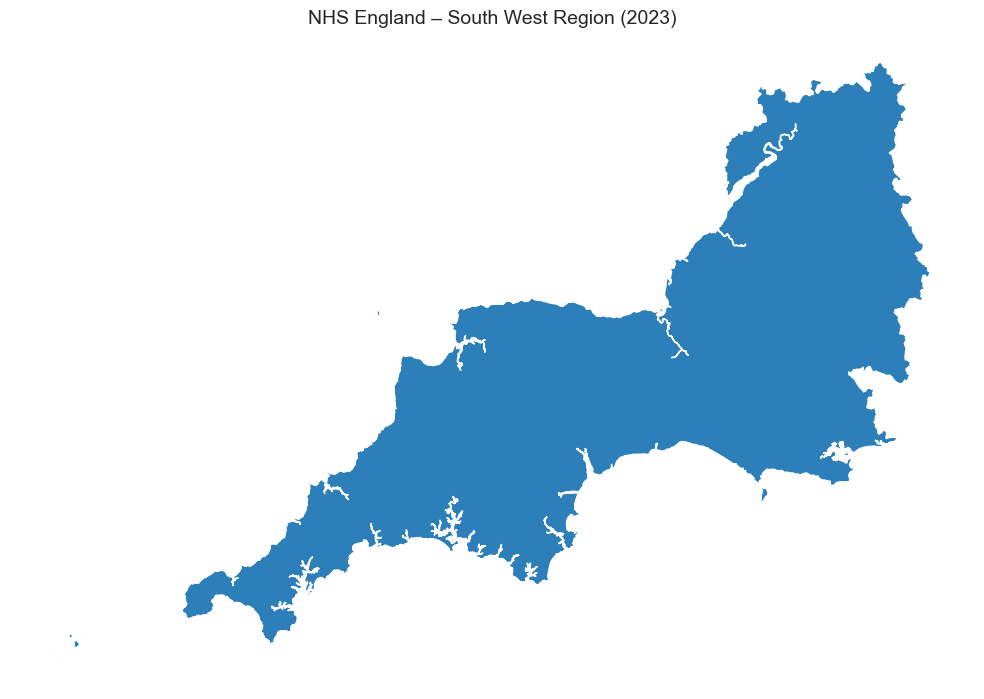

In [5]:


# File path to .shp
nhs_regions_path = "../data/raw/NHS_England_(Regions)_(December_2023)_EN_BGC.shp"

# Load shapefile
nhs_gdf = gpd.read_file(nhs_regions_path)

# Inspect structure
print(nhs_gdf.columns)
# Explore unique NHS England regions
print(nhs_gdf[['NHSER23CD', 'NHSER23NM']].drop_duplicates())

print(nhs_gdf.crs)

# Filter for South West region
sw_region = nhs_gdf[nhs_gdf["NHSER23NM"] == "South West"]

# Plot South West region
fig, ax = plt.subplots(figsize=(10, 12))
sw_region.plot(ax=ax, color="#2c7fb8", edgecolor="white", linewidth=1)
ax.set_title("NHS England – South West Region (2023)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


In [7]:
# Path to the .shp file for LSOA boundaries
lsoa_shp_path = "../data/raw/Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).shp"

# Load the shapefile
lsoa_gdf = gpd.read_file(lsoa_shp_path)

# Quick check
print(lsoa_gdf.columns)
print(lsoa_gdf.crs)
lsoa_gdf.head()

Index(['FID', 'LSOA21CD', 'LSOA21NM', 'LSOA21NMW', 'BNG_E', 'BNG_N', 'LAT',
       'LONG', 'Shape__Are', 'Shape__Len', 'GlobalID', 'geometry'],
      dtype='object')
EPSG:27700


,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry
0,1,E01000001,City of London 001A,None,532123,181632,51.51817,-0.097150,129865.314476,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8,"POLYGON ((532151.538 181867.433, 532152.5 1818..."
1,2,E01000002,City of London 001B,None,532480,181715,51.51883,-0.091970,228419.782242,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70,"POLYGON ((532634.497 181926.016, 532632.048 18..."
2,3,E01000003,City of London 001C,None,532239,182033,51.52174,-0.095330,59054.204697,1224.573160,b9d8faca-d489-478d-8ce6-acaf76186d7d,"POLYGON ((532153.703 182165.155, 532158.25 182..."
3,4,E01000005,City of London 001E,None,533581,181283,51.51469,-0.076280,189577.709503,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0,"POLYGON ((533619.062 181402.364, 533639.868 18..."
4,5,E01000006,Barking and Dagenham 016A,None,544994,184274,51.53875,0.089317,146536.995750,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0,"POLYGON ((545126.852 184310.838, 545145.213 18..."



South West NHS region geometry loaded: 1 region(s)

LSOAs in NHS South West region: 3476


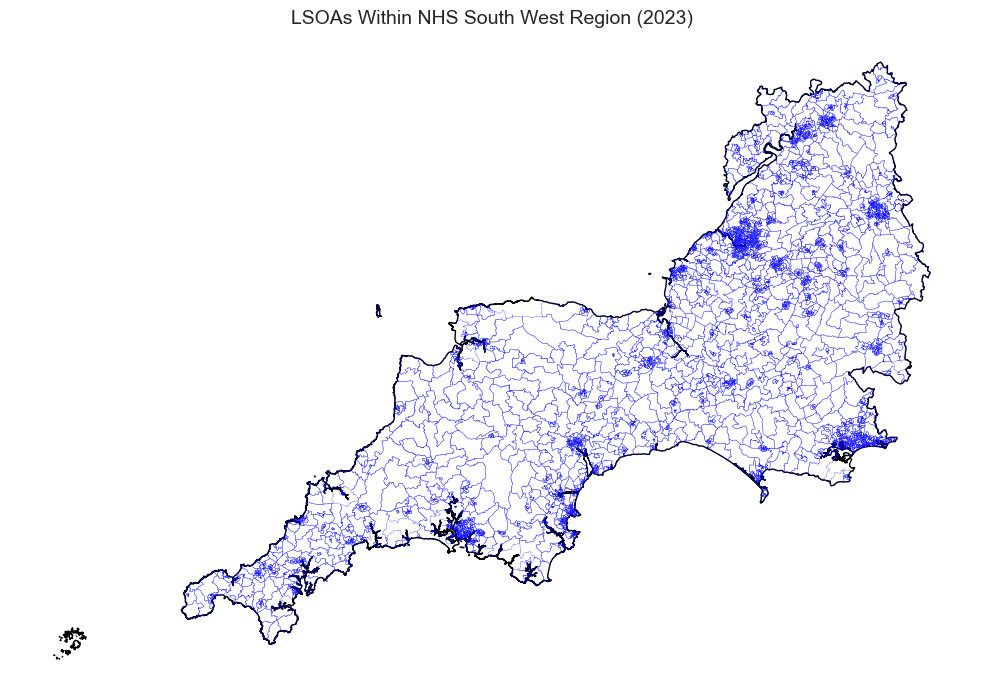

In [8]:
sw_region = nhs_gdf[nhs_gdf["NHSER23NM"] == "South West"]

# Test
print(f"\nSouth West NHS region geometry loaded: {len(sw_region)} region(s)")

if lsoa_gdf.crs != sw_region.crs:
    lsoa_gdf = lsoa_gdf.to_crs(sw_region.crs)
    print("📐 Reprojected LSOA CRS to match NHS region.")

lsoa_sw = gpd.clip(lsoa_gdf, sw_region)

# Test
print(f"\nLSOAs in NHS South West region: {len(lsoa_sw)}")

fig, ax = plt.subplots(figsize=(10, 12))
sw_region.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
lsoa_sw.boundary.plot(ax=ax, edgecolor="blue", linewidth=0.3, alpha=0.6)
ax.set_title("LSOAs Within NHS South West Region (2023)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


In [12]:
# Join IMD 2019 data to South West LSOA boundaries

imd_path = "../data/raw/Index_of_Multiple_Deprivation_(Dec_2019)_Lookup_in_England.csv"
imd_df = pd.read_csv(imd_path)

# Inspect structure
print("IMD Columns:", imd_df.columns.tolist())
print(imd_df[['LSOA11CD', 'IMD19']].head())


IMD Columns: ['FID', 'LSOA11CD', 'LSOA11NM', 'LAD19CD', 'LAD19NM', 'IMD19']
    LSOA11CD  IMD19
0  E01000001  29199
1  E01000104   6002
2  E01000205  27397
3  E01000002  30379
4  E01000003  14915


In [13]:
# Ensure LSOA codes are string and stripped
imd_df['LSOA11CD'] = imd_df['LSOA11CD'].astype(str).str.strip()
lsoa_sw['LSOA21CD'] = lsoa_sw['LSOA21CD'].astype(str).str.strip()


In [14]:
# Rename to align with GeoDataFrame
imd_df = imd_df.rename(columns={'LSOA11CD': 'LSOA21CD', 'IMD19': 'IMD_Rank'})

# Perform the merge
lsoa_sw = lsoa_sw.merge(imd_df[['LSOA21CD', 'IMD_Rank']], on='LSOA21CD', how='left')

# Check for unmatched rows
missing = lsoa_sw['IMD_Rank'].isna().sum()
print(f"⚠️ Missing IMD scores: {missing} rows")


⚠️ Missing IMD scores: 246 rows


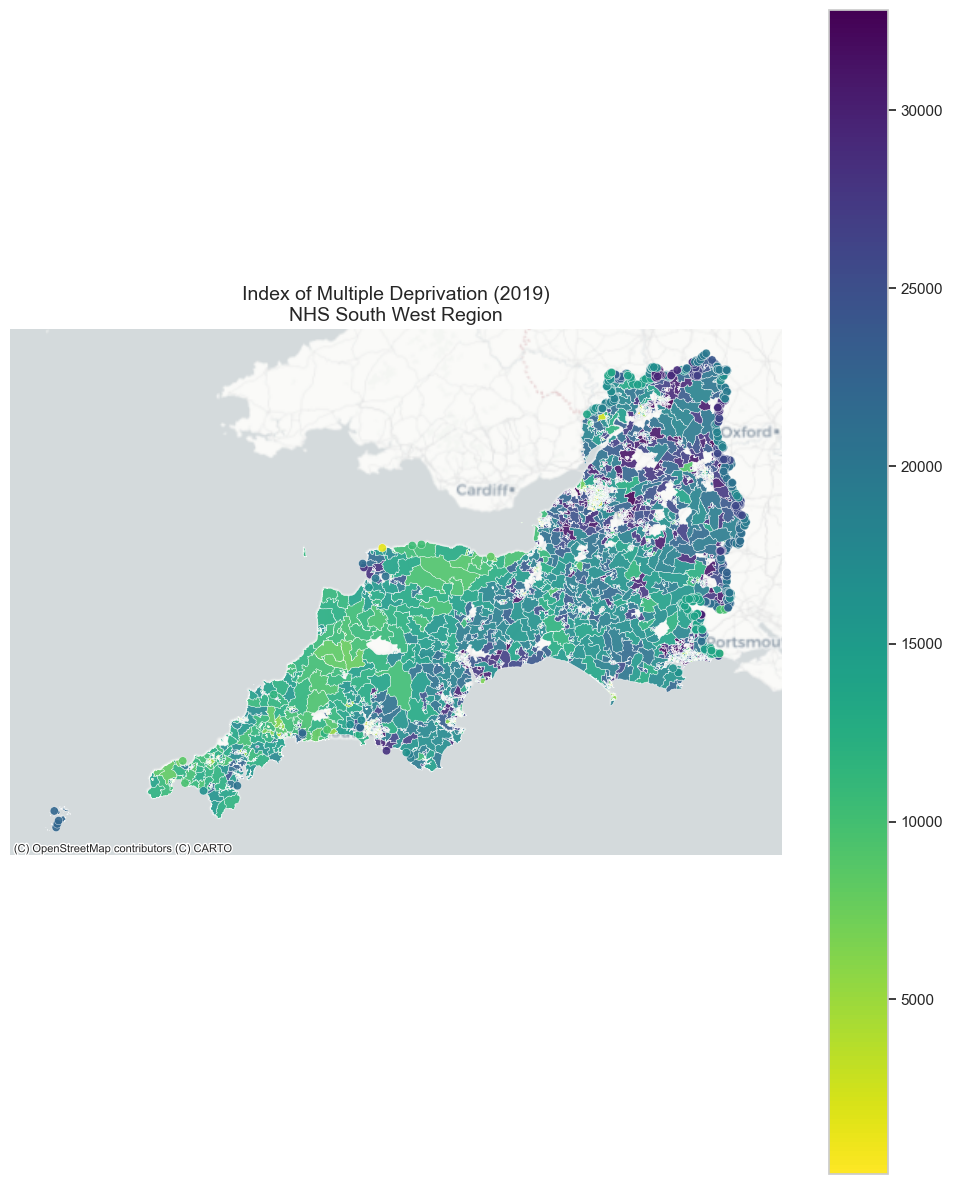

In [15]:
fig, ax = plt.subplots(figsize=(10, 12))
lsoa_sw.plot(
    ax=ax,
    column='IMD_Rank',
    cmap='viridis_r',
    legend=True,
    edgecolor='white',
    linewidth=0.3,
    alpha=0.9
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=lsoa_sw.crs)
ax.set_title("Index of Multiple Deprivation (2019)\nNHS South West Region", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


In [21]:
def impute_imd_from_neighbours(gdf: gpd.GeoDataFrame, imd_col: str = 'IMD19', k: int = 5) -> gpd.GeoDataFrame:
    """
    Impute missing IMD scores using k-nearest neighbouring LSOAs based on centroid proximity.

    Parameters
    ----------
    gdf : GeoDataFrame
        Input GeoDataFrame with 'geometry' and IMD score column.
    imd_col : str, default 'IMD19'
        The column name of the IMD score to impute.
    k : int, default 5
        Number of nearest neighbours to use for averaging.

    Returns
    -------
    GeoDataFrame
        Updated GeoDataFrame with missing IMD values filled.
    """
    from sklearn.neighbors import NearestNeighbors
    import numpy as np

    gdf = gdf.copy()
    missing_mask = gdf[imd_col].isna()
    gdf['centroid'] = gdf.geometry.centroid

    coords_all = np.array(list(gdf['centroid'].apply(lambda geom: (geom.x, geom.y))))
    coords_valid = coords_all[~missing_mask]
    coords_missing = coords_all[missing_mask]

    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(coords_valid)

    distances, indices = nn.kneighbors(coords_missing)
    imd_values = gdf.loc[~missing_mask, imd_col].values
    estimated = imd_values[indices].mean(axis=1)

    # Impute
    gdf.loc[missing_mask, imd_col] = estimated
    gdf['imd_imputed'] = False
    gdf.loc[missing_mask, 'imd_imputed'] = True

    return gdf.drop(columns='centroid')


### Handling Missing IMD Data via Spatial Imputation

To address incomplete Index of Multiple Deprivation (IMD) coverage within the NHS South West region, we applied a spatial imputation strategy using **k-nearest neighbours (k-NN)**. Specifically, missing IMD scores were estimated by averaging the values of the **five closest Lower Layer Super Output Areas (LSOAs)**, determined by centroid proximity.

This method has several advantages:
- Maintains **geographic continuity**, leveraging spatial proximity as a proxy for social similarity.
- Avoids the use of arbitrary buffer radii, which may introduce **edge effects or bias**.
- Is **computationally efficient and replicable**, making it suitable for large-scale geospatial health modelling.

All imputed values were flagged for transparency using a binary indicator (`imd_imputed`), allowing downstream analyses to optionally exclude or audit synthetic values.



✅ Imputed values: 246 of 3476


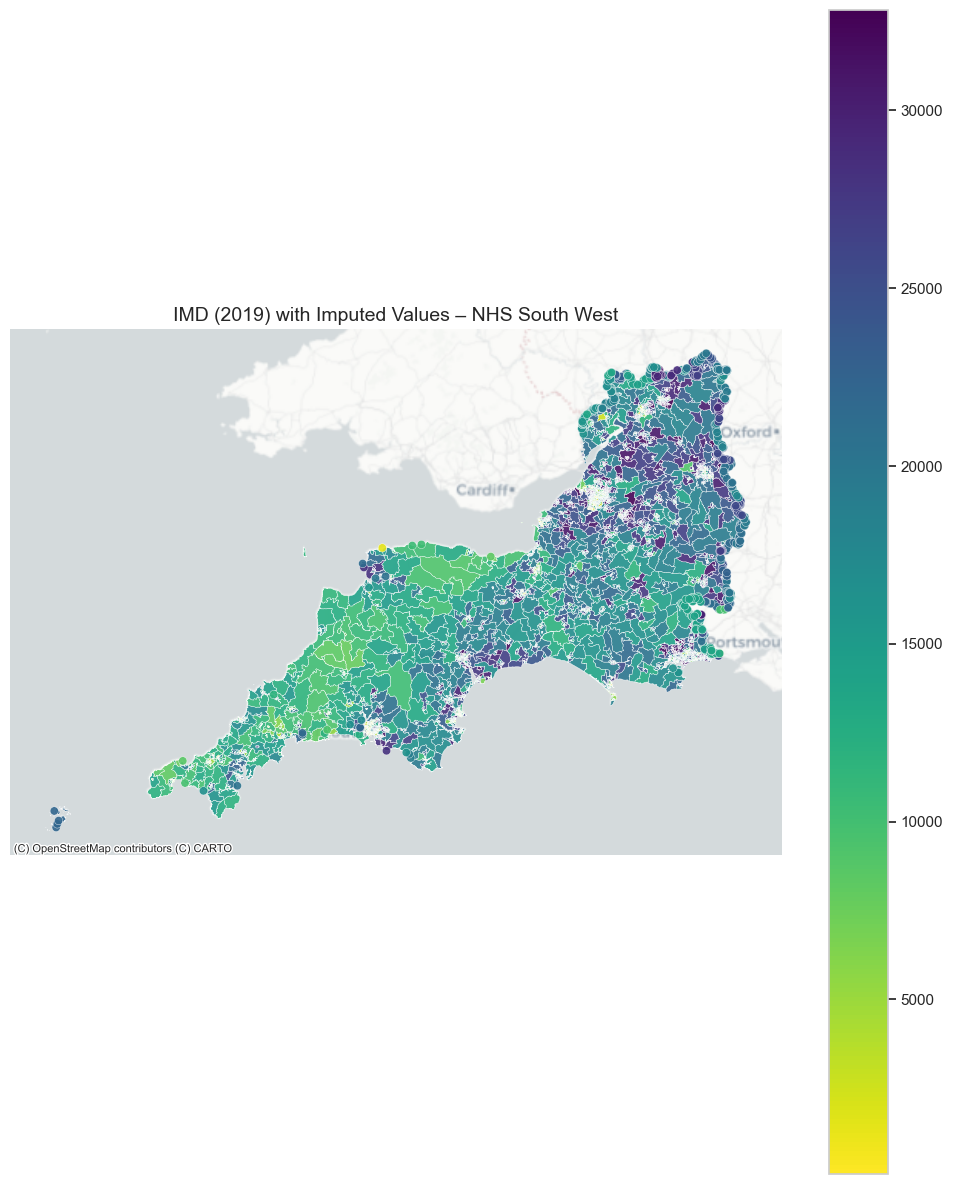

In [22]:
# Impute missing IMD values using 5-nearest neighbours
lsoa_sw = impute_imd_from_neighbours(lsoa_sw, imd_col='IMD_Rank', k=5)

# Summary of imputed vs. original
print(f"✅ Imputed values: {lsoa_sw['imd_imputed'].sum()} of {len(lsoa_sw)}")

# Visualise imputed vs non-imputed for verification
fig, ax = plt.subplots(figsize=(10, 12))
lsoa_sw.plot(
    ax=ax,
    column='IMD_Rank',
    cmap='viridis_r',
    edgecolor='white',
    linewidth=0.3,
    alpha=0.9,
    legend=True
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=lsoa_sw.crs)
ax.set_title("IMD (2019) with Imputed Values – NHS South West", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


In [23]:
def backmap_imd_from_2011(lsoa_gdf_2021, imd_df_2011, lookup_path):
    """
    Attempt to impute missing IMD19 scores by backmapping to 2011 LSOA codes.

    Parameters
    ----------
    lsoa_gdf_2021 : GeoDataFrame
        2021-based LSOA geometries (must have 'LSOA21CD' and 'IMD_Rank' columns).
    imd_df_2011 : DataFrame
        IMD 2019 dataset, indexed by 'LSOA11CD'.
    lookup_path : str
        Path to the ONS lookup CSV mapping 2011 <-> 2021 LSOAs.

    Returns
    -------
    GeoDataFrame
        Updated GeoDataFrame with imputed IMD_Rank values (where found).
    """
    # Load ONS lookup
    lookup_df = pd.read_csv(lookup_path)

    # Clean relevant columns
    lookup_df = lookup_df[['LSOA11CD', 'LSOA21CD']].dropna()

    # Ensure all as strings
    lookup_df = lookup_df.astype(str)
    imd_df_2011 = imd_df_2011.astype(str)

    # Merge lookup onto 2021 LSOAs that are missing IMD
    missing = lsoa_gdf_2021[lsoa_gdf_2021['IMD_Rank'].isna()].copy()
    backmatch = missing.merge(lookup_df, on='LSOA21CD', how='left')

    # Now join with 2011 IMD
    imd_merged = backmatch.merge(imd_df_2011[['LSOA11CD', 'IMD19']], on='LSOA11CD', how='left')
    imd_merged['IMD19'] = pd.to_numeric(imd_merged['IMD19'], errors='coerce')

    print(f"🔁 Backmapped IMD values for {imd_merged['IMD19'].notna().sum()} additional LSOAs")

    # Update main GeoDataFrame
    lsoa_gdf_2021.loc[imd_merged.index, 'IMD_Rank'] = imd_merged['IMD19'].values

    return lsoa_gdf_2021


In [24]:
lookup_path = "../data/raw/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Exact_Fit_Lookup_for_EW_(V3).csv"

lsoa_sw = backmap_imd_from_2011(lsoa_sw, imd_df, lookup_path)


🔁 Backmapped IMD values for 0 additional LSOAs


In [25]:
missing_after = lsoa_sw['IMD_Rank'].isna().sum()
print(f"🔎 Remaining missing IMD values: {missing_after}")


🔎 Remaining missing IMD values: 0
